In [1]:
# Neezcha Dinman
# ICS 483
# Homework 2

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
from scipy import misc
from scipy.ndimage import gaussian_filter

In [3]:
####  5  ####

In [4]:
# 5a
# write your own function eg. im_heq = my_hist_equalization(gray_image, n_bins)
# each level is going to occur at regular frequency 

In [5]:
# import image > histogram > cum sum > normalise cum sum > use ncs to modify origional image > display 
# flat array image will act as index to look ip ncs values found 

In [8]:
def my_hist_equalization(gray_image, n_bins):
    
    # import image, make it a flat aray
    img = mpimg.imread(gray_image)
    imgArr = np.array(img)
    imgFlat = imgArr.flatten()
    
    #array, bin sizes 0
    histogram = np.zeros(n_bins) 
    
    # sum up counts of pixels
    for pixel in imgFlat:
        histogram[pixel] += 1
        
    # return histogram #TEST
    
    # cumlative sum
    histogram = iter(histogram)
    b = [next(histogram)]
    for i in histogram:
        b.append(b[-1] + i)
        
   # return np.array(b) #TEST

    #normalize cum sum 0-1 
    cs = np.array(b)
    nj = (cs - cs.min()) * 1
    N = cs.max() - cs.min()
    cs = nj / N
    cs.astype('uint8') #can't use floating point values in images   
    
    # value from cum sum for every index in flat
    imgNew = cs[imgFlat] 
    imgNewShape = np.reshape(imgNew, img.shape)
    
    # DISPALY OLD-HIST, NEW-HIST
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
        
    fig.add_subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Origional Image', fontsize=15)

    fig.add_subplot(2,2,2)
    plt.hist(imgFlat, bins=n_bins)
    plt.xlabel('Intensity', fontsize=18)
    plt.ylabel('Frequencey', fontsize=16)
    
    fig.add_subplot(2,2,3)
    plt.imshow(imgNewShape, cmap='gray')
    plt.title('Histogram Equalization', fontsize=15)

    fig.add_subplot(2,2,4)
    plt.hist(imgNew, bins=n_bins)
    plt.xlabel('Intensity', fontsize=18)
    plt.ylabel('Frequencey', fontsize=16)

    plt.show(block=True)
    # fig.savefig("landsat_hist_equalized.png") #5c
    
    return fig

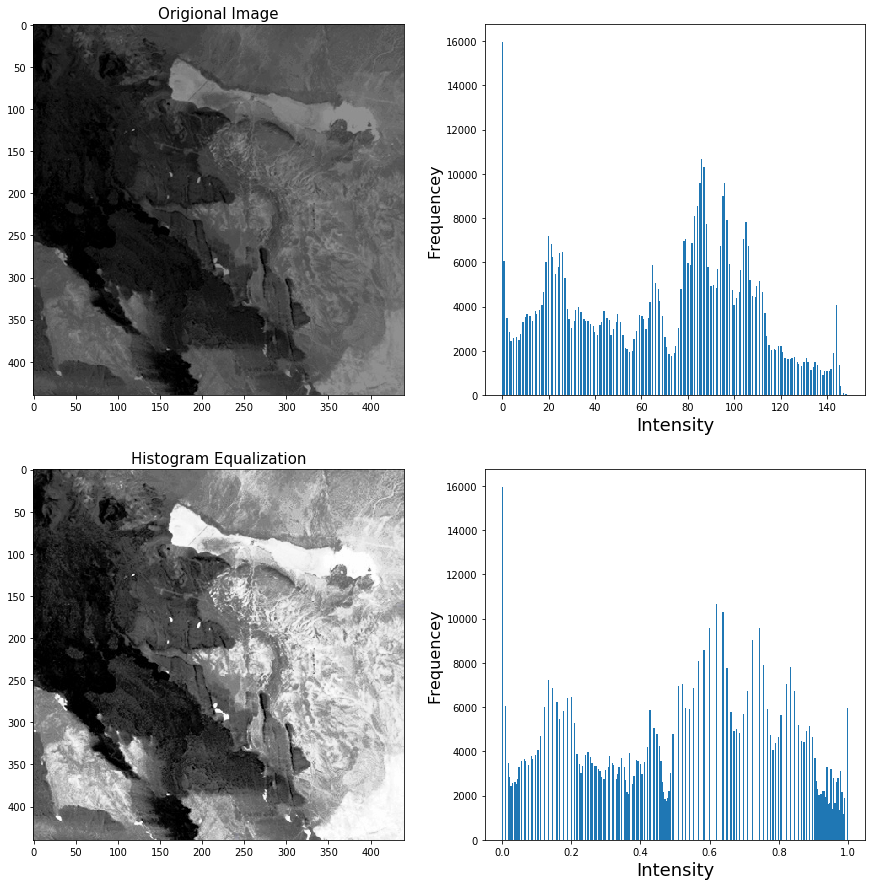

In [7]:
# 5b
landHist = my_hist_equalization('landsat.jpg', 256)

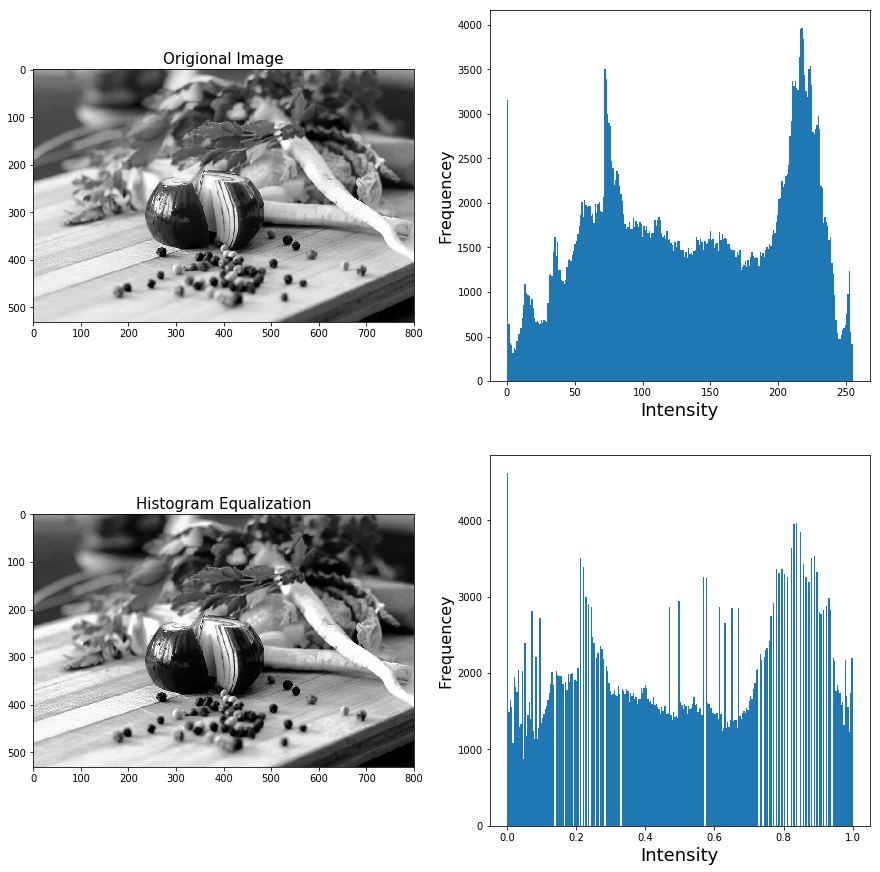

In [9]:
convHist = my_hist_equalization('conv_test.jpg', 256)

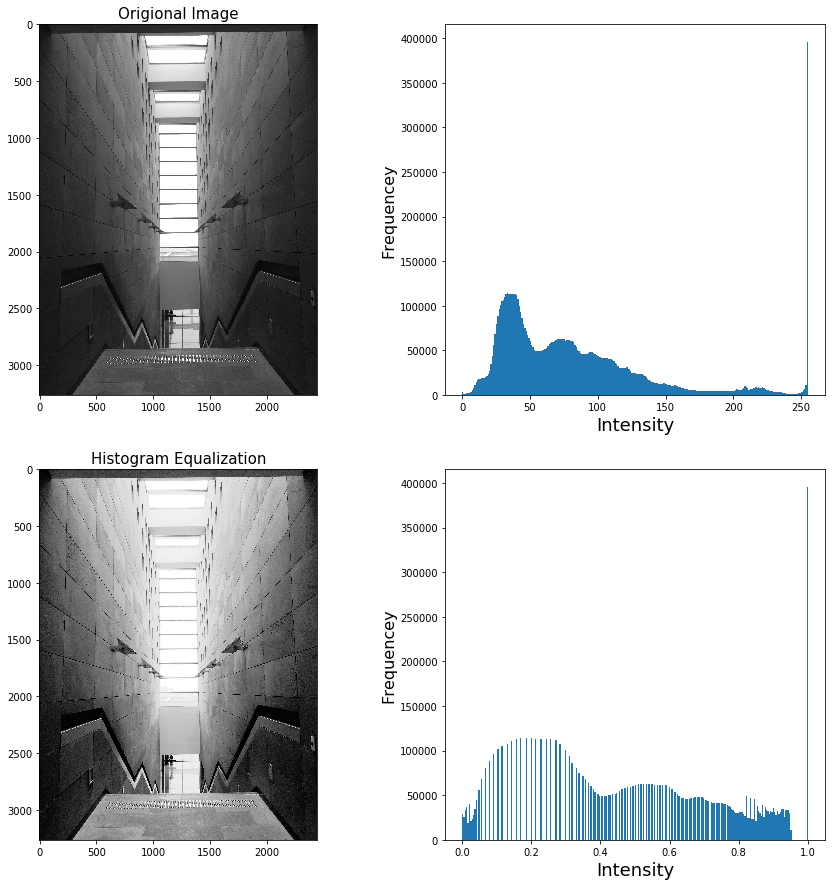

In [10]:
wallHist = my_hist_equalization('wall_gray.jpg', 256)

In [11]:
####  6  ####

In [12]:
# 6a
# write a function for contrast stretching

In [13]:
# change intensities of origional photo to new intensity range

In [25]:
def contrast_stretch(gray_image):
    n_bins = 256
    
    # import image, make it a flat aray
    img = mpimg.imread(gray_image)
    imgArr = np.array(img)
    imgFlat = imgArr.flatten()
   
   # photo intensity
    min_intensity = imgFlat.min()
    max_intensity = imgFlat.max()
    
    # new intenity range
    minNew = 0
    maxNew = 255 # 255 doesnt work with landsat...

    # math
    stretched = (imgFlat-min_intensity)*(((maxNew-minNew)/(max_intensity-min_intensity))+minNew)
    stretched.astype('int')
    
    # array into an image so it can be displayed
    imgNewShape = np.reshape(stretched, img.shape)
    
    # DISPALY OLD-HIST, NEW-HIST
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
        
    fig.add_subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Origional Image', fontsize=15)

    fig.add_subplot(2,2,2)
    plt.hist(imgFlat, bins=n_bins)
    plt.xlabel('Intensity', fontsize=18)
    plt.ylabel('Frequencey', fontsize=16)
    
    fig.add_subplot(2,2,3)
    plt.imshow(imgNewShape, cmap='gray')
    plt.title('Contrast Stretched', fontsize=15)

    fig.add_subplot(2,2,4)
    plt.hist(stretched, bins=n_bins)
    plt.xlabel('Intensity', fontsize=18)
    plt.ylabel('Frequencey', fontsize=16)

    plt.show(block=True)
    # fig.savefig('landsat_stretched.png') # 6c
    # fig.savefig('wall_gray_stretched.png') # 6e

    return stretched

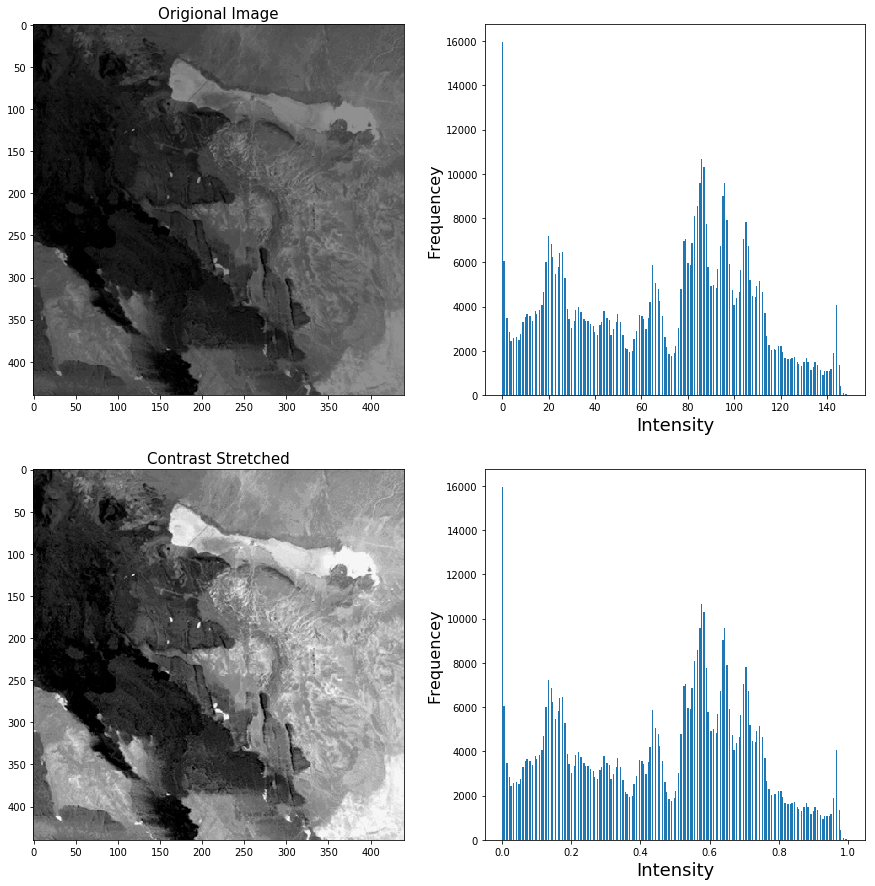

array([0.12080537, 0.12080537, 0.12080537, ..., 0.89932886, 0.89932886,
       0.89932886])

In [17]:
# 6b
# "Clipping input data to valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)."
# This is because the new intensity range is from 0-255 wich cause the altered land photo to be spotted black and white
# Samge thing happens with Histrogram Equalization when the normalized cumlative sum is set from 0-255 as well.
# This only effects the landsat.jpg phot, but can be fixed when new max intensity is set to 1
contrast_stretch('landsat.jpg')

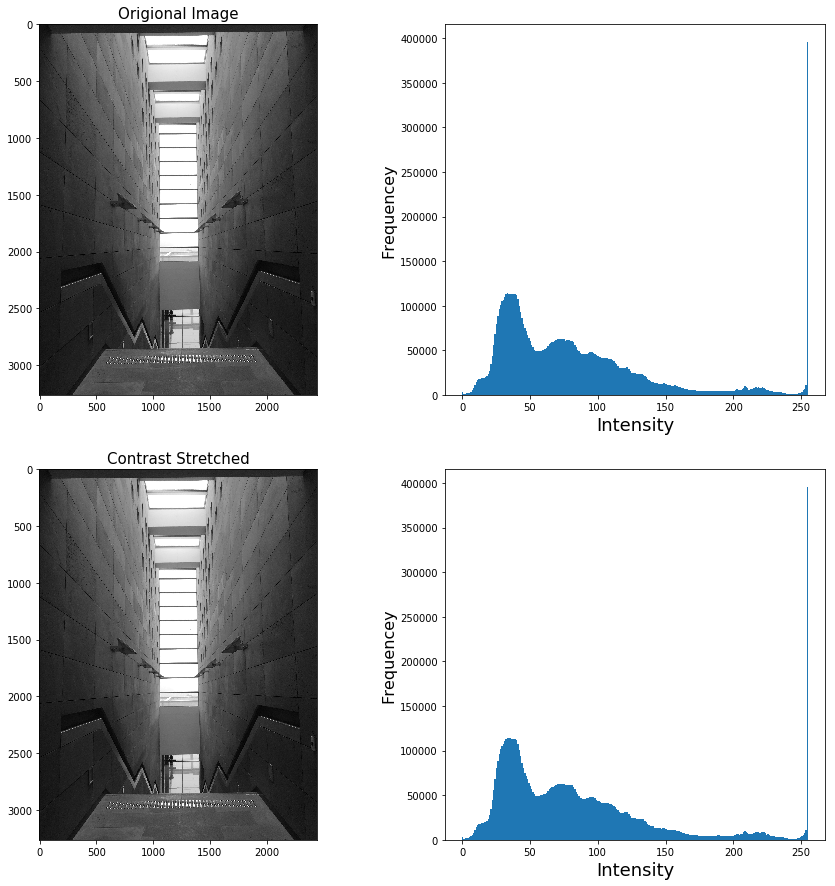

array([24., 20., 17., ..., 24., 25., 25.])

In [24]:
# 6d
contrast_stretch('wall_gray.jpg')

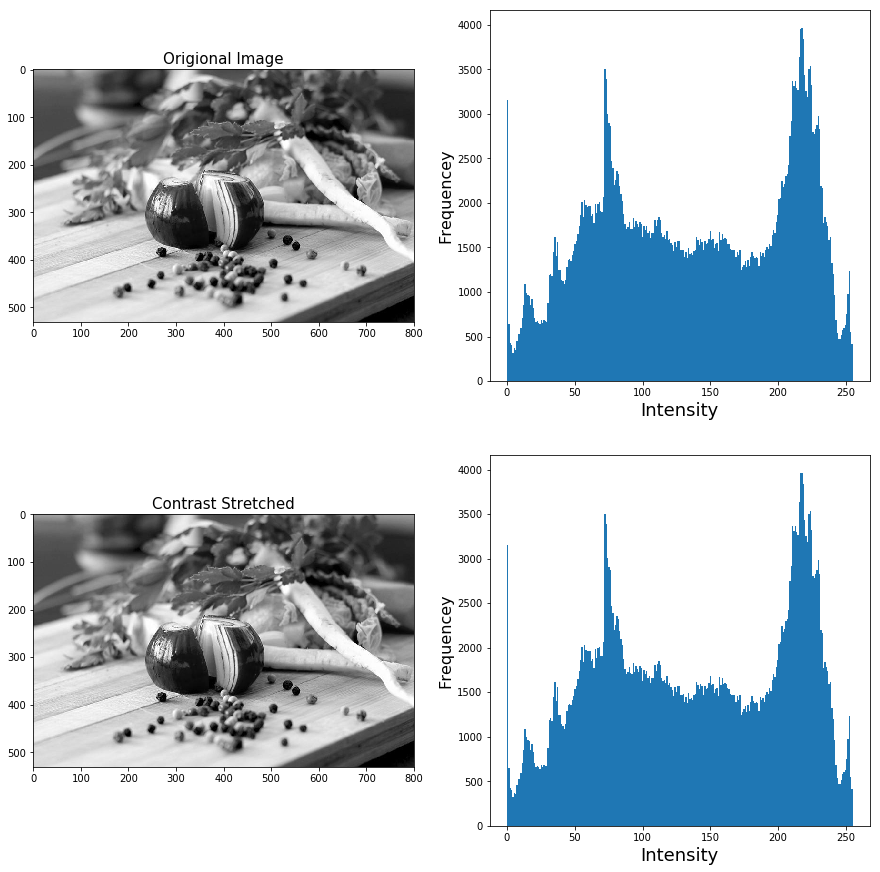

array([164., 164., 164., ...,  36.,  37.,  37.])

In [26]:
contrast_stretch('conv_test.jpg')

In [27]:
####  7  ####

In [28]:
# 7a
# 2D convolution filter
# im_conv = my_convolution2d(gray_image, h)

In [29]:
def my_convolution2d(gray_image, h):
    
    # import image, make it a flat aray
    img = mpimg.imread(gray_image)
    # imgArr = np.array(img)
    # imgFlat = imgArr.flatten()
    
    # variables 
    y, x = img.shape
    m, n = h.shape
    y = y - m + 1
    x = x - m + 1
    imgNew = np.zeros((y,x))
    
    #flip array horizontally and vertically
    np.fliplr(np.flipud(h))
    
    #apply to each pixle
    for i in range(y):
        for j in range(x):
            imgNew[i][j] = np.sum(img[i:i+m, j:j+m]*h) 
    
    return imgNew #return imageConv2D same size as origional image

In [31]:
# 7b
# the larger the filter h the more blurred the convolved photo is
gray_img = mpimg.imread('conv_test.jpg')
gray_img.shape

(531, 800)

In [32]:
# box filter of size 3x3, 9x9, 15x15, 1x13, and 13x1
# h33 = np.array([[-1,-2,-3],[-0,-1,-2],[-0,-1,-2]]) 
# h99 = np.array([[0,-1,-2,-3,-4,-5,-6,-7,-8],[9,8,7,6,5,4,3,2,1],[0,1,2,3,4,5,6,7,8],[0,-1,-2,-3,-4,-5,-6,-7,-8],[9,8,7,6,5,4,3,2,1],[0,1,2,3,4,5,6,7,8],[0,-1,-2,-3,-4,-5,-6,-7,-8],[9,8,7,6,5,4,3,2,1],[0,1,2,3,4,5,6,7,8]]) 
h33 = np.ones([3,3])
h99 = np.ones([9,9])
h15 = np.ones([15,15])
# h113 = np.ones([1,13])
# h131 = np.ones([31,1])
h99.shape

(9, 9)

In [33]:
img33 =my_convolution2d('conv_test.jpg', h33)
img99 = my_convolution2d('conv_test.jpg', h99)
img15 = my_convolution2d('conv_test.jpg', h15)
#img113 = my_convolution2d('conv_test.jpg', h113)
#img131 = my_convolution2d('conv_test.jpg', h131)

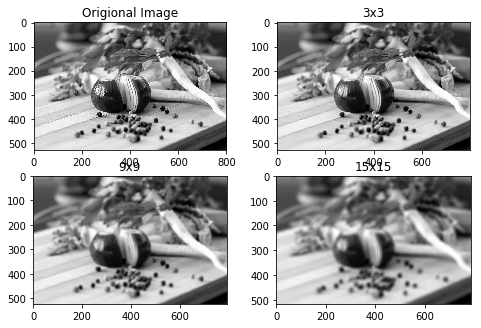

In [42]:
 # DISPALY OLD 5xNEW 
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
       
fig.add_subplot(3,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Origional Image', fontsize=12)

fig.add_subplot(3,2,2)
plt.imshow(img33, cmap='gray')
plt.title('3x3', fontsize=12)
plt.imsave('conv_test_box3x3.jpg', img33, cmap='gray') # 7b

fig.add_subplot(3,2,3)
plt.imshow(img99, cmap='gray')
plt.title('9x9', fontsize=12)
plt.imsave('conv_test_box9x9.jpg', img99, cmap='gray') # 7b

fig.add_subplot(3,2,4)
plt.imshow(img15, cmap='gray')
plt.title('15x15', fontsize=12)
plt.imsave('conv_test_box15x15.jpg', img15, cmap='gray') # 7b

In [35]:
# 7c
# use a prebuilt functioln from a library, use Gaussian filter with standard deviations sigma = 2, 5, 10

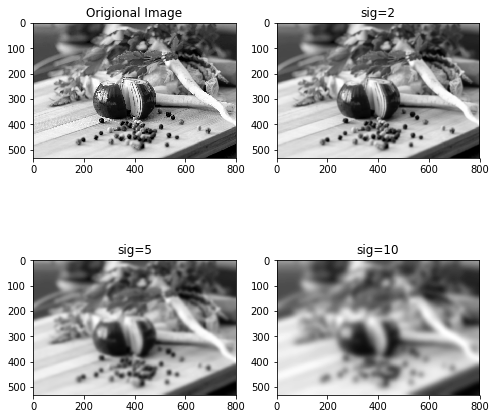

In [43]:
 # DISPALY LIBRARY FUNCTION GAUSSIAN 
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
       
fig.add_subplot(2,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Origional Image', fontsize=12)

fig.add_subplot(2,2,2)
libGaus = gaussian_filter(gray_img, sigma=2) 
plt.imshow(libGaus, cmap='gray')
plt.title('sig=2')
plt.imsave('conv_test_gauss_s2.jpg', libGaus, cmap='gray') # 7c

fig.add_subplot(2,2,3)
libGaus = gaussian_filter(gray_img, sigma=5) 
plt.imshow(libGaus, cmap='gray')
plt.title('sig=5')
plt.imsave('conv_test_gauss_s5.jpg', libGaus, cmap='gray') # 7c

fig.add_subplot(2,2,4)
libGaus = gaussian_filter(gray_img, sigma=10) 
plt.imshow(libGaus, cmap='gray')
plt.title('sig=10')
plt.imsave('conv_test_gauss_s10.jpg', libGaus, cmap='gray') # 7c